In [58]:
# train the model
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
# 1. Load dataset
df = pd.read_csv("C:/Users/HP/Downloads/banking Data.csv")

print("Data Shape:", df.shape)
print("Columns:", df.columns)


Data Shape: (3000, 25)
Columns: Index(['Client ID', 'Name', 'Age', 'Sex', 'Location ID', 'Joined Bank',
       'Banking Contact', 'Nationality', 'Occupation', 'Investment Advisor',
       'Fee Structure', 'Loyalty Classification', 'Banking Relationship',
       'Estimated Income', 'Superannuation Savings', 'Amount of Credit Cards',
       'Credit Card Balance', 'Bank Loans', 'Bank Deposits',
       'Checking Accounts', 'Saving Accounts', 'Foreign Currency Account',
       'Business Lending', 'Properties Owned', 'Risk Weighting'],
      dtype='object')


In [60]:
# 2. Preprocessing
from sklearn.calibration import LabelEncoder


target_col = "Risk Weighting"   # Change this if your target column is different

X = df.drop(columns=[target_col])
y = df[target_col]

# Encode categorical features
for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [61]:
# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

In [62]:
# 4. Train ML Model
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(n_estimators=200, random_state=42)

In [63]:
# 5. Predictions & Evaluation
y_pred = model.predict(X_test)

print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           1       0.82      0.75      0.78       167
           2       0.62      0.84      0.71       245
           3       0.41      0.36      0.38        92
           4       0.37      0.20      0.26        64
           5       0.00      0.00      0.00        32

    accuracy                           0.63       600
   macro avg       0.44      0.43      0.43       600
weighted avg       0.58      0.63      0.60       600



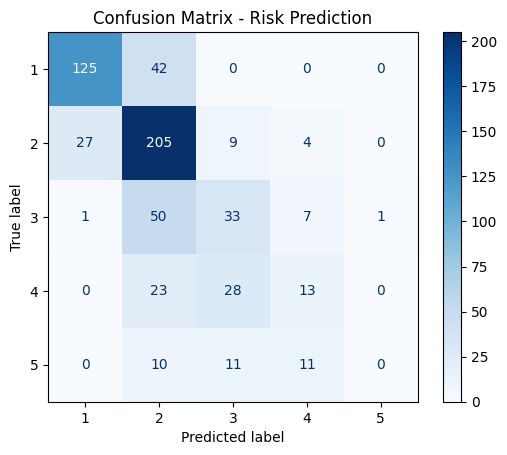

In [64]:
# Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Risk Prediction")
plt.show()

In [65]:
# 6. Feature Importance Visualization
feature_importances = model.feature_importances_
features = X.columns

C:\Users\HP\AppData\Local\Temp\ipykernel_7792\3459554874.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances[indices], y=features[indices], palette="viridis")


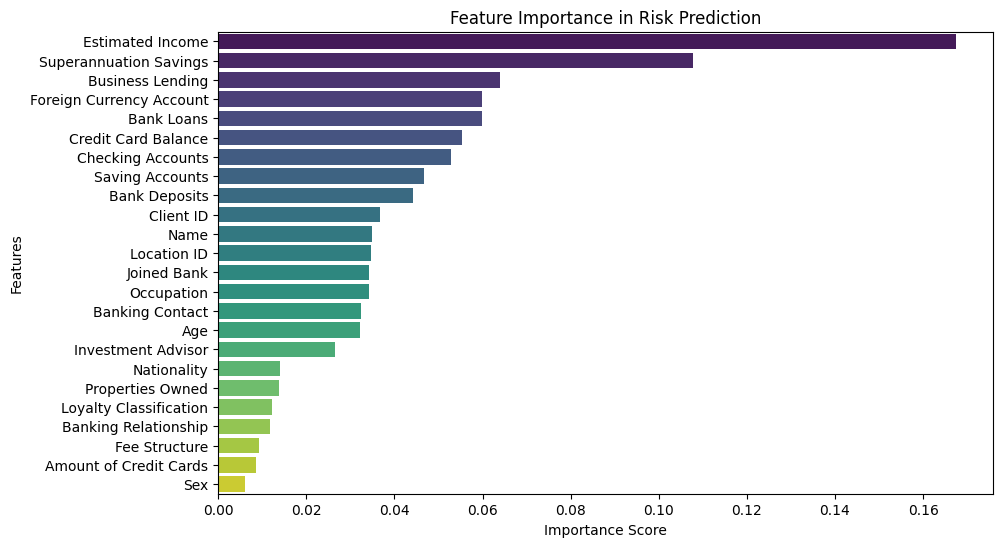

In [66]:
# Sort features by importance
import numpy as np
indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances[indices], y=features[indices], palette="viridis")
plt.title("Feature Importance in Risk Prediction")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


In [67]:
# 7. Save Model & Preprocessor
joblib.dump(model, "risk_model.pkl")
joblib.dump(scaler, "scaler.pkl")

print("Model, scaler, and feature importance plot generated successfully!")

Model, scaler, and feature importance plot generated successfully!


In [ ]:
# 8. Save Model & Preprocessor
joblib.dump(model, "risk_model.pkl")
joblib.dump(scaler, "scaler.pkl")

print(" Model and scaler saved successfully!")

 Model and scaler saved successfully!
